In [137]:
"""
Tshikana Rasehlomi
e-mail: rasehlomi@gmail.com
DS_CODE CHALLENGE
QUESTION 2: INITIAL DATA TRANSFORMATION 
10-07-2022
"""

# Load required modules
#=================================================================================================================================
import pandas as pd
import geopandas as gpd
import time
import matplotlib.pyplot as plt

# read the .geojson and csv files respective
#====================================================================================================

# read a geojson file
#====================================================================================================
hex_gjson = gpd.read_file('https://cct-ds-code-challenge-input-data.s3.af-south-1.amazonaws.com/city-hex-polygons-8.geojson') 

# read a service requests.csv file
#====================================================================================================
sr_df = pd.read_csv('https://cct-ds-code-challenge-input-data.s3.af-south-1.amazonaws.com/sr.csv.gz', compression='gzip', header=0, sep=',', quotechar='\"') 
# convert a panda dataframe to a geopandas geodataframe
#======================================================================================================
sr_df_gpd = gpd.GeoDataFrame(sr_df, crs={'init' :'epsg:4326'}, geometry=gpd.points_from_xy(sr_df.longitude, sr_df.latitude))
sr_df_gpd.head()

C:\Users\TRasehlomi.TRASEHLOMI-NB\Anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Unnamed: 0,notification_number,reference_number,creation_timestamp,completion_timestamp,directorate,department,branch,section,code_group,code,cause_code_group,cause_code,official_suburb,latitude,longitude,geometry
0,0,400583534,9.109492e+09,2020-10-07 06:55:18+02:00,2020-10-08 15:36:35+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area Central,District: Blaauwberg,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Wear and tear,MONTAGUE GARDENS,-33.872839,18.522488,POINT (18.52249 -33.87284)
1,1,400555043,9.108995e+09,2020-07-09 16:08:13+02:00,2020-07-14 14:27:01+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area East,District : Somerset West,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,SOMERSET WEST,-34.078916,18.848940,POINT (18.84894 -34.07892)
2,2,400589145,9.109614e+09,2020-10-27 10:21:59+02:00,2020-10-28 17:48:15+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area East,District : Somerset West,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,STRAND,-34.102242,18.821116,POINT (18.82112 -34.10224)
3,3,400538915,9.108601e+09,2020-03-19 06:36:06+02:00,2021-03-29 20:34:19+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area North,District : Bellville,TD Customer complaint groups,Paint Markings Lines&Signs,Road Markings,Wear and tear,RAVENSMEAD,-33.920019,18.607209,POINT (18.60721 -33.92002)
4,4,400568554,NaN,2020-08-25 09:48:42+02:00,2020-08-31 08:41:13+02:00,URBAN MOBILITY,Roads Infrastructure Management,RIM Area South,District : Athlone,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Surfacing failure,CLAREMONT,-33.987400,18.453760,POINT (18.45376 -33.98740)


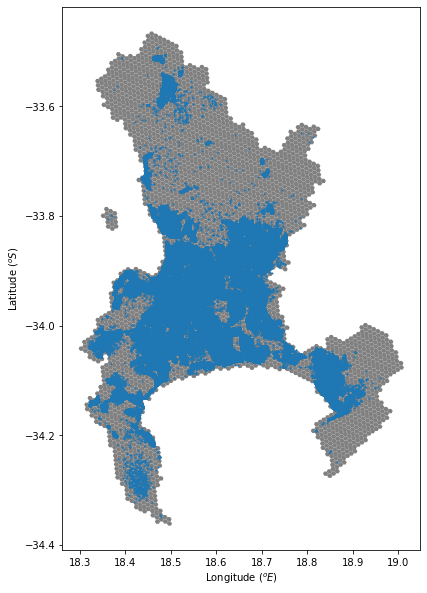

In [139]:
# quick visualization of the service request map
#========================================================================
fig, ax = plt.subplots(figsize=(12,10))
hex_gjson.plot(color="Gray", ax= ax)
sr_df_gpd.plot(ax=ax, markersize=1)
ax.set_xlabel('Longitude ($^oE$)', fontsize=10)
ax.set_ylabel('Latitude ($^oS$)', fontsize=10)
plt.show()

In [140]:
# check missing values on lat and longitude
#====================================================================================================
sr_df.isnull().values.any() # check on the entire dataframe
sr_df.isnull().values.any() # check on longitude
sr_df.latitude.isnull().any() # check on latitude
#if there are missing values, replace the lat and longitude values with zero
#=====================================================================================================
sr_df.longitude.fillna(0,inplace=True)
sr_df.latitude.fillna(0,inplace=True)

In [142]:
# Before we perform spatial joining of the 2 files we need to answer the following question:
# Are the layers in the same projection? 
#===================================================================================================================
hex_gjson.crs == sr_df_gpd.crs # False = No, True = Yes

# if they are NOT, then we re-project to the projection of the hex-level-8.json
#===================================================================================================================
sr_df_gpd = sr_df_gpd.to_crs(hex_gjson.crs)
# verify the new crs projection of service requests
#===================================================================================================================
print(sr_df_gpd.crs)
# verify that they have similar projection
#====================================================================================================================
sr_df_gpd.crs == hex_gjson.crs

epsg:4326


True

In [143]:
# Now we perform a spatial joining of the service request to H3 res level 8.geojson file
# Record the time it takes to join service requests to single H3 resolution level 8
# include error log record
#=======================================================================================

start_time = time.time()
try:
    merged_service_requests = gpd.sjoin(sr_df_gpd, hex_gjson, op="within")
    print("dataframes successfully merged")
    
except FileNotFoundError:
    print('file not found')

end_time = time.time()

print("Operation_time_to_merge_df: ",(end_time-start_time),"sec")

# sample of rows from merged dataframe
#=============================================================================================
merged_service_requests.head()


C:\Users\TRasehlomi.TRASEHLOMI-NB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


dataframes successfully merged
Operation_time_to_merge_df:  25.084994554519653 sec


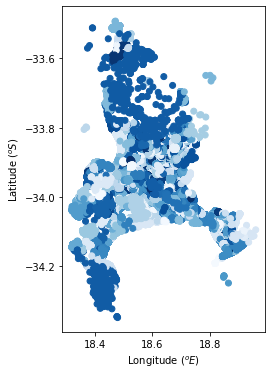

In [145]:
# quick visualization of the merged dataframe
#=======================================================================================
merged_service_requests.plot(column="official_suburb", cmap="Blues_r", figsize=(10,6))
plt.xlabel('Longitude ($^oE$)', fontsize=10)
plt.ylabel('Latitude ($^oS$)', fontsize=10)
sr_df_gpd.plot(ax=ax)
plt.show()

In [146]:
# Did our joining function increase or reduce some data points? 
# check the lengths of the new dataframe vs original dataframe
#==============================================================================

len(merged_service_requests), len(sr_df_gpd)


(729267, 941634)

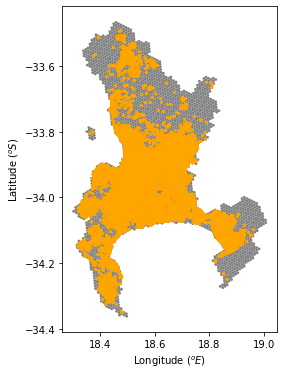

In [147]:
# The new merged dataframe has fewer data points than the original service request dataframe (df_gpd)
# importantly, when plot layers on top of each other, it is clear that some points fall outside the grid squares
# this means that we may have not necessarily lost the data points
# let us visualize  these data points
#==============================================================================================
fig, ax = plt.subplots(figsize=(10,6))
hex_gjson.plot(color="Gray", ax=ax)
sr_df_gpd.plot(ax=ax, color='orange', markersize=5)
plt.xlabel('Longitude ($^oE$)', fontsize=10)
plt.ylabel('Latitude ($^oS$)', fontsize=10)
plt.show()